In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statistics import mean
import csv
from sklearn.preprocessing import MinMaxScaler
# import modin.pandas as pd        # Modin import as a parallel computing library

# Tenserflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
X_train=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\x_train11.xlsx")

In [3]:
print(X_train)

           0         1         2
0   0.630520  0.225200  0.229268
1   0.176638  0.431646  0.407182
2   0.525529  0.518877  0.525631
3   0.554800  0.359440  0.356064
4   0.455412  0.137373  0.137142
..       ...       ...       ...
71  0.558646  0.436111  0.594082
72  0.528911  0.496520  0.500355
73  0.462394  0.489956  0.483144
74  0.597957  0.182267  0.410025
75  0.238706  0.462992  0.405682

[76 rows x 3 columns]


In [4]:
Y_train=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\y_train11.xlsx")

In [5]:
print(Y_train)

    0
0   1
1   1
2   1
3   1
4   1
.. ..
71  0
72  0
73  0
74  0
75  0

[76 rows x 1 columns]


In [6]:
Y_train=np.asarray(Y_train)

In [7]:
X_train=np.asarray(X_train)

In [8]:
print(np.shape(X_train))
print(np.shape(Y_train))

(76, 3)
(76, 1)


In [23]:
from keras.layers import Layer
from keras import backend as K
from keras import activations
from tensorflow.keras.activations import sigmoid

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

ImportError: cannot import name 'Adam' from 'tensorflow.keras.activations' (C:\Users\mrsub\anaconda3\lib\site-packages\keras\api\_v2\keras\activations\__init__.py)

In [74]:
model = keras.Sequential()
# model.add(Flatten())
model.add(Dense(78))
# model.add(RBFLayer(10, 0.5))
model.add(Dense(25, activation='linear'))
# model.add(RBFLayer(10, 0.5))
model.add(Dense(10, activation='sigmoid'))

# model.add(keras.Dense(3,input_shape=(73,3),activation='relu'))

In [75]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
# mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [76]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [77]:
history = model.fit( X_train,Y_train,epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 3ms/step - loss: 2.2491 - accuracy: 0.1579
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 1.9785 - accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 1.5703 - accuracy: 0.5000
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 1.1923 - accuracy: 0.4868
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 0.9321 - accuracy: 0.5000
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7971 - accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7397 - accuracy: 0.5395
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7169 - accuracy: 0.5000
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.4342
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.5132
Epoch 11/500
3/3 [===========

3/3 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5921
Epoch 85/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5921
Epoch 86/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.4868
Epoch 87/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.5921
Epoch 88/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5921
Epoch 89/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.6447
Epoch 90/500
3/3 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.4474
Epoch 91/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5132
Epoch 92/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6184
Epoch 93/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6953 - accuracy: 0.5921
Epoch 94/500
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.4474
Epoch 168/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.4605
Epoch 169/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.6316
Epoch 170/500
3/3 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.5658
Epoch 171/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.6053
Epoch 172/500
3/3 [==============================] - 0s 4ms/step - loss: 0.7059 - accuracy: 0.4737
Epoch 173/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7075 - accuracy: 0.4474
Epoch 174/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6747 - accuracy: 0.6579
Epoch 175/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7225 - accuracy: 0.5526
Epoch 176/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.6053
Epoch 177/500
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5789
Epoch 250/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.4868
Epoch 251/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5395
Epoch 252/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.6316
Epoch 253/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5921
Epoch 254/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.5921
Epoch 255/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.5658
Epoch 256/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5000
Epoch 257/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6053
Epoch 258/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6184
Epoch 259/500
3/3 [=====

3/3 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.6184
Epoch 332/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.5789
Epoch 333/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.4737
Epoch 334/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6796 - accuracy: 0.5921
Epoch 335/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.6184
Epoch 336/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5921
Epoch 337/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5526
Epoch 338/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.4474
Epoch 339/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.6184
Epoch 340/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5921
Epoch 341/500
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.6184
Epoch 414/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.5789
Epoch 415/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.5921
Epoch 416/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5921
Epoch 417/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5789
Epoch 418/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.5132
Epoch 419/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.5000
Epoch 420/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5526
Epoch 421/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6838 - accuracy: 0.5132
Epoch 422/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 423/500
3/3 [=====

3/3 [==============================] - 0s 6ms/step - loss: 0.6809 - accuracy: 0.6184
Epoch 496/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5263
Epoch 497/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5132
Epoch 498/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.6447
Epoch 499/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.6053
Epoch 500/500
3/3 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.6053


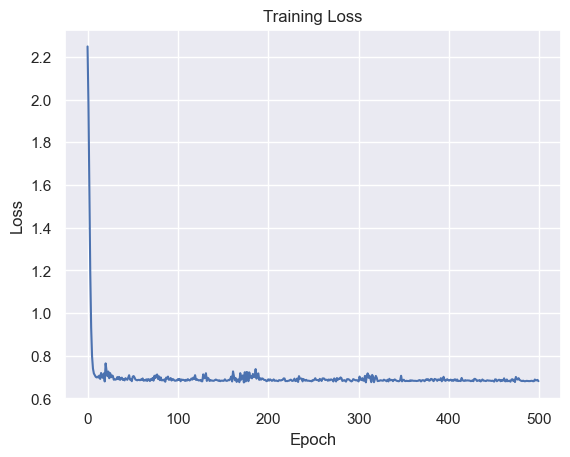

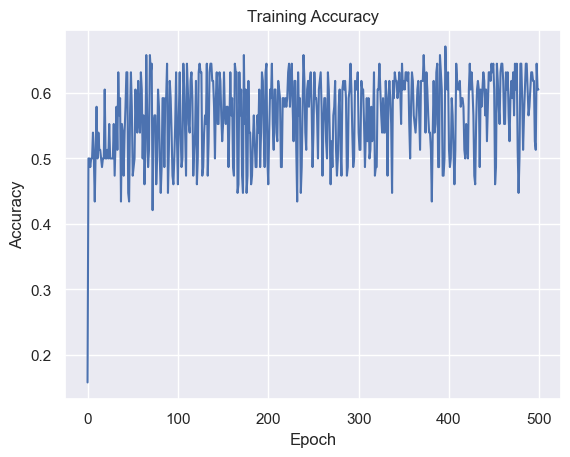

In [78]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [79]:
x_val=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\x_val11.xlsx")

In [80]:
y_val=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\y_val11.xlsx")

In [81]:
y_val=np.asarray(y_val)
x_val=np.asarray(x_val)
print(np.shape(x_val))

(36, 3)


In [82]:
model.evaluate(x_val,y_val)

2/2 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.6944


[0.6626036763191223, 0.6944444179534912]

2/2 [==============================] - 0s 5ms/step


C:\Users\mrsub\AppData\Local\Temp\ipykernel_956\3566385366.py:20: RuntimeWarning: invalid value encountered in true_divide
  specificity = np.diag(cm) / np.sum(cm, axis=0)


Class: 0
Recall: 1.00
Sensitivity: 1.00
Specificity: 0.50

Class: 1
Recall: 0.00
Sensitivity: 0.00
Specificity: nan



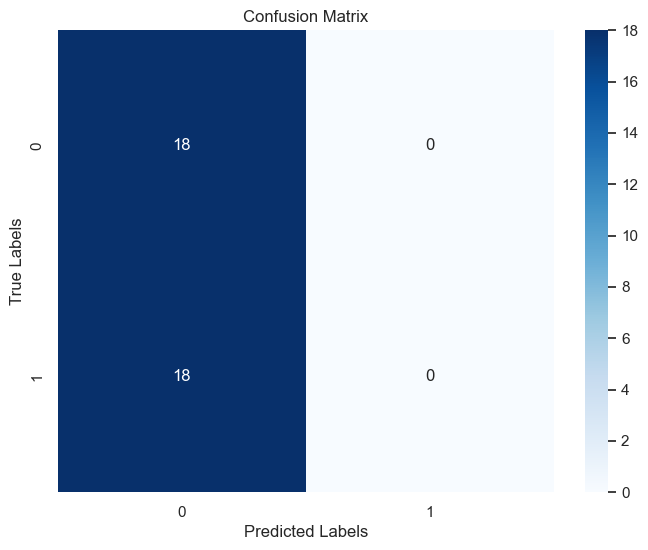

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and evaluated your model
# and obtained the validation predictions `y_pred` for `x_val`
y_pred=model.predict(x_val)
y_pred=np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Get the class labels
classes = np.unique(y_val)

# Calculate recall, sensitivity, and specificity
recall = np.diag(cm) / np.sum(cm, axis=1)
sensitivity = recall
specificity = np.diag(cm) / np.sum(cm, axis=0)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display recall, sensitivity, and specificity
for i, class_label in enumerate(classes):
    print(f"Class: {class_label}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"Sensitivity: {sensitivity[i]:.2f}")
    print(f"Specificity: {specificity[i]:.2f}")
    print()
    
plt.show()


In [48]:
print(y_pred)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [87]:
x_val=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\x_val11.xlsx")
y_val=pd.read_excel(r"C:\Users\mrsub\ML\Minor-Project I\All data for 14 electrodes and 30 subjects\Normalised Excel\y_val11.xlsx")

In [19]:
X = np.concatenate((X_train, x_val), axis=0)
y = np.concatenate((Y_train, y_val), axis=0)

In [21]:
print(str(X.shape)+"      "+str(y.shape))

(112, 3)      (112, 1)


In [23]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Define a function to create your Keras model
def create_model():
    # Create and return your Keras Sequential model here
    model = keras.Sequential()
    # model.add(Flatten())
    model.add(Dense(78))
    # model.add(RBFLayer(10, 0.5))
    model.add(Dense(25, activation='linear'))
    # model.add(RBFLayer(10, 0.5))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# model.add(keras.Dense(3,input_shape=(73,3),activation='relu'))
    return model

# Create a KerasClassifier based on your model function
estimator = KerasClassifier(build_fn=create_model, epochs=500)

# Assuming you have X and y defined
# Perform cross-validation
k = 5
scores = cross_val_score(estimator, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Epoch 1/500


C:\Users\mrsub\AppData\Local\Temp\ipykernel_11384\993791128.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_model, epochs=500)


3/3 [==============================] - 0s 4ms/step - loss: 2.1170 - accuracy: 0.4494
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 1.8975 - accuracy: 0.6292
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 1.5523 - accuracy: 0.6292
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 1.2479 - accuracy: 0.6292
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 1.0525 - accuracy: 0.6292
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 0.9134 - accuracy: 0.6292
Epoch 7/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7793 - accuracy: 0.6292
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.6292
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7253 - accuracy: 0.4494
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.6292
Epoch 11/500
3/3 [=======================

3/3 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6292
Epoch 168/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6404
Epoch 169/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6404
Epoch 170/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6180
Epoch 171/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6517
Epoch 172/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6517
Epoch 173/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6629
Epoch 174/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6517
Epoch 175/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6629
Epoch 176/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6742
Epoch 177/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6517
Epoch 332/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6404
Epoch 333/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6292
Epoch 334/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6742
Epoch 335/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6404
Epoch 336/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6517
Epoch 337/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6517
Epoch 338/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6517
Epoch 339/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6517
Epoch 340/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6517
Epoch 341/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6404
Epoch 496/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6404
Epoch 497/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6629
Epoch 498/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6742
Epoch 499/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6517
Epoch 500/500
1/1 [==============================] - 0s 187ms/step - loss: 1.1281 - accuracy: 0.2609
Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 2.2328 - accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 2.0535 - accuracy: 0.3034
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 1.7654 - accuracy: 0.5393
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 1.4422 - accuracy: 0.5393
Epoch 5/500
3/3 [=========

3/3 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6404
Epoch 161/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6517
Epoch 162/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5955
Epoch 163/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6404
Epoch 164/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6629
Epoch 165/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6067
Epoch 166/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5618
Epoch 167/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6180
Epoch 168/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6404
Epoch 169/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6404
Epoch 170/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6404
Epoch 325/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5843
Epoch 326/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6629
Epoch 327/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6292
Epoch 328/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6404
Epoch 329/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6404
Epoch 330/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6404
Epoch 331/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6404
Epoch 332/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6517
Epoch 333/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6404
Epoch 334/500
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6067
Epoch 489/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6292
Epoch 490/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6742
Epoch 491/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6517
Epoch 492/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6404
Epoch 493/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6292
Epoch 494/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6067
Epoch 495/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6517
Epoch 496/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6292
Epoch 497/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6629
Epoch 498/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6111
Epoch 154/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.5889
Epoch 155/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.5889
Epoch 156/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.5667
Epoch 157/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.5778
Epoch 158/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.5667
Epoch 159/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6000
Epoch 160/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6000
Epoch 161/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6111
Epoch 162/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.5889
Epoch 163/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6111
Epoch 318/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6111
Epoch 319/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6000
Epoch 320/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6111
Epoch 321/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6111
Epoch 322/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6000
Epoch 323/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6000
Epoch 324/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6111
Epoch 325/500
3/3 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.5778
Epoch 326/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6000
Epoch 327/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6111
Epoch 482/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.5889
Epoch 483/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.5889
Epoch 484/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6000
Epoch 485/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.5889
Epoch 486/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6000
Epoch 487/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.5889
Epoch 488/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.5556
Epoch 489/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.5667
Epoch 490/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6111
Epoch 491/500
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.6556
Epoch 147/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6333
Epoch 148/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6889
Epoch 149/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6444
Epoch 150/500
3/3 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6778
Epoch 151/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6333
Epoch 152/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5444
Epoch 153/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6111
Epoch 154/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6444
Epoch 155/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5889
Epoch 156/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6667
Epoch 311/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6667
Epoch 312/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6556
Epoch 313/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6556
Epoch 314/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6778
Epoch 315/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6778
Epoch 316/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6778
Epoch 317/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6667
Epoch 318/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6778
Epoch 319/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6556
Epoch 320/500
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6667
Epoch 475/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6778
Epoch 476/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.6556
Epoch 477/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6667
Epoch 478/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6889
Epoch 479/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6556
Epoch 480/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6778
Epoch 481/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5889
Epoch 482/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6556
Epoch 483/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6556
Epoch 484/500
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5667
Epoch 133/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5556
Epoch 134/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5556
Epoch 135/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5333
Epoch 136/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5556
Epoch 137/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5333
Epoch 138/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5667
Epoch 139/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5444
Epoch 140/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5333
Epoch 141/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5444
Epoch 142/500
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5667
Epoch 297/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5667
Epoch 298/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5778
Epoch 299/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5556
Epoch 300/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5667
Epoch 301/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5667
Epoch 302/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5556
Epoch 303/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5444
Epoch 304/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5667
Epoch 305/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5444
Epoch 306/500
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5333
Epoch 461/500
3/3 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5222
Epoch 462/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5333
Epoch 463/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5667
Epoch 464/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5667
Epoch 465/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5778
Epoch 466/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5556
Epoch 467/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5444
Epoch 468/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5667
Epoch 469/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5778
Epoch 470/500
3/3 [=====

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)# Train the model on training data
rf.fit(X_train,Y_train)

C:\Users\mrsub\AppData\Local\Temp\ipykernel_11384\3498436722.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=1000)

In [25]:
predictions = rf.predict(x_val)# Calculate the absolute errors
print(np.round_(predictions))

[0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


In [26]:
from sklearn.metrics import mean_squared_error 
import math
mse = mean_squared_error(y_val, predictions)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse))

Accuracy for Random Forest 47.65196160122314


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor with desired parameters
rf = RandomForestRegressor(n_estimators=1000)

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [-0.35771429  0.00228571 -0.76       -1.17555556  0.15535714  0.175
  0.04666667 -0.00833333  0.3675      0.06892857]
Mean score: -0.14858650793650802
Standard deviation: 0.45426110966072036


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

In [366]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [373]:
dat1=regressor.predict(x_val)
print(dat1)

[1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]


In [85]:
predictions = regressor.score(x_val,y_val)
print(predictions)

In [374]:
from sklearn.metrics import accuracy_score  
scores_classification = accuracy_score(y_val,dat1)

In [375]:
print(scores_classification)

0.6388888888888888


In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = DecisionTreeRegressor(random_state = 0) 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [ 0.         -1.          0.21428571 -0.46666667  0.26666667 -0.1
 -2.66666667 -2.66666667 -1.56666667 -0.46666667]
Mean score: -0.8452380952380955
Standard deviation: 1.0533269826726668


In [34]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(x_val)
print("Accuracy of default XGBoost:", accuracy_score(y_val, y_pred))

# Hyperparameter tuning using Grid Search CV
params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7,9,11],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0,0.5],
    "colsample_bytree": [0.8, 1.0]
}

grid = GridSearchCV(xgb, params, cv=5, scoring="accuracy", verbose=1)
grid.fit(X_train, Y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# XGBoost classifier with best parameters
xgb_best = grid.best_estimator_
y_pred_best = xgb_best.predict(x_val)
print("Accuracy of tuned XGBoost:", accuracy_score(y_val, y_pred_best))

cm = confusion_matrix(y_val, y_pred_best)
print("Confusion matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_val, y_pred_best)
print("Classification report:")
print(cr)


Accuracy of default XGBoost: 0.6944444444444444
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best score: 0.6716666666666666
Accuracy of tuned XGBoost: 0.6111111111111112


NameError: name 'confusion_matrix' is not defined

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = xgb_best 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.5        0.75       0.45454545 0.54545455 0.36363636 0.81818182
 0.54545455 0.72727273 0.72727273 0.72727273]
Mean score: 0.615909090909091
Standard deviation: 0.14461762063575487


In [36]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create random forest classifier with default parameters
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Make predictions on test set
y_pred = rf.predict(x_val)

# Evaluate accuracy
print("Accuracy of random forest:", accuracy_score(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_val, y_pred)
print("Classification report:")
print(cr)



Accuracy of random forest: 0.5833333333333334


C:\Users\mrsub\AppData\Local\Temp\ipykernel_11384\2843688425.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


NameError: name 'confusion_matrix' is not defined

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = rf 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Cross-validation scores: [0.5        0.58333333 0.54545455 0.63636364 0.27272727 0.54545455
 0.63636364 0.54545455 0.72727273 0.54545455]
Mean score: 0.5537878787878787
Standard deviation: 0.11259370141262852


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
ann = MLPClassifier(hidden_layer_sizes=(76, 3), activation="identity", solver="adam", alpha=0.0001, max_iter=200)
ann.fit(X_train, Y_train)

# Make predictions on test set
y_pred = ann.predict(x_val)

# Evaluate accuracy
print("Accuracy of ANN with RBF kernel:", accuracy_score(y_val, y_pred))

Accuracy of ANN with RBF kernel: 0.6944444444444444


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = ann 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y 

Cross-validation scores: [0.5        0.58333333 0.54545455 0.90909091 0.45454545 0.54545455
 0.45454545 0.36363636 0.27272727 0.18181818]
Mean score: 0.4810606060606061
Standard deviation: 0.18720707145646442


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Make predictions on test set
y_pred = svm.predict(x_val)

# Evaluate accuracy
print("Accuracy of SVM classifier:", accuracy_score(y_val, y_pred))


Accuracy of SVM classifier: 0.6388888888888888


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = svm 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.25       0.5        0.54545455 0.45454545 0.54545455 0.36363636
 0.63636364 0.63636364 0.45454545 0.45454545]
Mean score: 0.484090909090909
Standard deviation: 0.1122874484275966


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [42]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Create SVM classifier with default parameters
svm = SVC()
svm.fit(X_train, Y_train)

# Make predictions on test set
y_pred = svm.predict(x_val)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_val, y_pred)
print("Classification report:")
print(cr)


Confusion matrix:
[[17  1]
 [14  4]]
Classification report:
              precision    recall  f1-score   support

           0       0.55      0.94      0.69        18
           1       0.80      0.22      0.35        18

    accuracy                           0.58        36
   macro avg       0.67      0.58      0.52        36
weighted avg       0.67      0.58      0.52        36



C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = svm 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.58333333 0.33333333 0.63636364 0.54545455 0.81818182 0.72727273
 0.63636364 0.63636364 0.63636364 0.63636364]
Mean score: 0.618939393939394
Standard deviation: 0.11882352974602273


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [44]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree as the base estimator
dt = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with 50 estimators and a learning rate of 1
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=50, learning_rate=1)

# Define the parameter grid to try for AdaBoost classifier
param_grid = {
    "n_estimators": [10, 20, 30, 40, 50],
    "learning_rate": [0.1, 0.5, 1.0],
    "base_estimator__max_depth": [1, 2, 3]
}

# Create a grid search object with 5-fold cross-validation
grid = GridSearchCV(abc, param_grid=param_grid, cv=5)

# Fit the grid search object on the training data
grid.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Make predictions on the test data using the best model
y_pred = grid.predict(x_val)

# Evaluate accuracy
print("Accuracy of tuned AdaBoost:", accuracy_score(y_val, y_pred))


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Best parameters: {'base_estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 30}
Best score: 0.6858333333333333
Accuracy of tuned AdaBoost: 0.5555555555555556


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = abc 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross-validation scores: [0.75       0.66666667 0.54545455 0.54545455 0.54545455 0.63636364
 0.72727273 0.81818182 0.72727273 0.45454545]
Mean score: 0.6416666666666666
Standard deviation: 0.10999467805808576


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [10]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier with default parameters
rf = RandomForestClassifier()

# Define the parameter grid to try for random forest classifier
param_grid = {
    "n_estimators": [10, 20, 30, 40, 50],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

# Create a grid search object with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fit the grid search object on the training data
grid.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Make predictions on the test data using the best model
y_pred = grid.predict(x_val)

# Evaluate accuracy
print("Accuracy of tuned random forest:", accuracy_score(y_val, y_pred))


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest

C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 30}
Best score: 0.6849999999999999
Accuracy of tuned random forest: 0.5833333333333334


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [11]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Create a KNN classifier with default parameters
knn = KNeighborsClassifier()

# Define the parameter grid to try for KNN classifier
param_grid = {
    "n_neighbors": [2,3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

# Create a grid search object with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the grid search object on the training data
grid.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Make predictions on the test data using the best model
y_pred = grid.predict(x_val)

# Evaluate accuracy
print("Accuracy of tuned KNN:", accuracy_score(y_val, y_pred))


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.645
Accuracy of tuned KNN: 0.7222222222222222


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = X_train,x_val,Y_train,y_val

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Instantiate the RandomForestRegressor with desired parameters
regressor = classifier 

# Assuming you have X_train and Y_train defined
# Define the number of folds (k)
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.66666667 0.41666667 0.63636364 0.54545455 0.54545455 0.72727273
 0.54545455 0.45454545 0.63636364 0.36363636]
Mean score: 0.5537878787878787
Standard deviation: 0.11022401848783675


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = X_train,x_val,Y_train,y_val

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Neural Networks
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Networks Accuracy:", nn_accuracy)

# Support Vector Machines
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machines Accuracy:", svm_accuracy)

# Gaussian Processes
gp_classifier = GaussianProcessClassifier()
gp_classifier.fit(X_train, y_train)
gp_predictions = gp_classifier.predict(X_test)
gp_accuracy = accuracy_score(y_test, gp_predictions)
print("Gaussian Processes Accuracy:", gp_accuracy)


C:\Users\mrsub\AppData\Local\Temp\ipykernel_8976\2190085895.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Accuracy: 0.6388888888888888
Gradient Boosting Accuracy: 0.5277777777777778
Neural Networks Accuracy: 0.6666666666666666
Support Vector Machines Accuracy: 0.5833333333333334
Gaussian Processes Accuracy: 0.6666666666666666


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


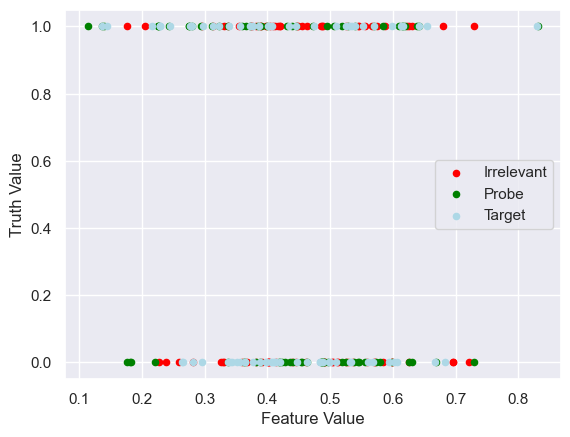

In [170]:
X=X_train.reshape(76,3)
y=Y_train.reshape(76)
# Plot the data
# plt.scatter(X[:, 0],y,'red', X[:, 1],y,'blue',X[:, 2],y,'yellow' )
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.figure(figsize=(10, 6))
colors = ['red', 'green', '#ADD8E6']

# Plotting multiple features with different colors
plt.scatter(X[:, 0], y, color=colors[0], label='Irrelevant',s=20)
plt.scatter(X[:, 1], y, color=colors[1], label='Probe',s=20)
plt.scatter(X[:, 2], y, color=colors[2], label='Target',s=20)
plt.legend()
plt.xlabel('Feature Value')
plt.ylabel('Truth Value')
plt.show()

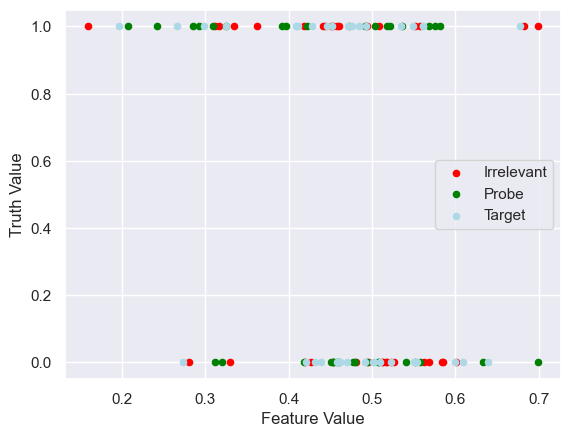

In [169]:
X=np.asarray(x_val)
X=X.reshape(36,3)
y=np.asarray(y_val)
y=y.reshape(36)
# Plot the data
# plt.scatter(X[:, 0],y,'red', X[:, 1],y,'blue',X[:, 2],y,'yellow' )
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.figure(figsize=(10, 6))
colors = ['red', 'green', '#ADD8E6']

# Plotting multiple features with different colors
plt.scatter(X[:, 0], y, color=colors[0], label='Irrelevant',s=20)
plt.scatter(X[:, 1], y, color=colors[1], label='Probe',s=20)
plt.scatter(X[:, 2], y, color=colors[2], label='Target',s=20)
plt.legend()
plt.xlabel('Feature Value')
plt.ylabel('Truth Value')
plt.show()

In [185]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = X_train,x_val,Y_train,y_val

# Create and train a nonlinear SVM classifier
svm = SVC(kernel='rbf', C=6.0, gamma='scale')  # rbf kernel for nonlinear classification
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary
# def plot_decision_boundary(model, X, y):
#     h = 0.02  # step size in the mesh
#     x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, alpha=0.8)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.title('Nonlinear SVM Decision Boundary')
#     plt.show()
# plot_decision_boundary(svm, X_test, y_test)

Accuracy: 0.6388888888888888


C:\Users\mrsub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
